# Spike Challenge

*Objective:* Predict the price of milk given macroeconomic and weather variables. 

By Daniela A. Gómez Cravioto


## Libraries

In this section we import the libraries that will be used for the data analysis.

In [1]:
# pandas data frames
import pandas as pd

#datetime format
import datetime

#multidimensional arrays
import numpy as np
np.random.seed(123)

#visualizations
import seaborn as sns 
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,8
rcParams['figure.dpi'] = 100
plt.style.use('fivethirtyeight')
#statistics 
from statsmodels.tsa.stattools import adfuller

## Data

In [2]:
missing_values = ['','a']

varClim = pd.read_csv('Data/precipitaciones.csv') #precipitaciones por region
varMacr = pd.read_csv('Data/banco_central.csv', na_values=missing_values) #variables macroeconomicas
precios  = pd.read_csv('Data/precio_leche.csv') #variable dependiente

## Cleansing and Exploratory Data Analysis

In [3]:
varClim.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [4]:
varMacr.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [5]:
precios.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [6]:
varMacr.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


As can be observed from the previous table, not all features appear in the description. Hence, it will need to check the data type and change it accordingly

In [7]:
varClim.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [8]:
precios.describe()

,Anio,Precio_leche
count,506.000000,506.000000
mean,1999.584980,114.444980
std,12.183973,78.999882
min,1979.000000,3.850000
25%,1989.000000,48.162500
50%,2000.000000,102.250000
75%,2010.000000,189.175000
max,2021.000000,318.880000


The output variable (Precio_leche) has a mean of 114.4450 and a standard deviation of 78.9999, indicating high variations of the target variable. Additionally, a maximum price of 318.88 (which is 2.5878 times more than the std) and a minimum of 3.85.

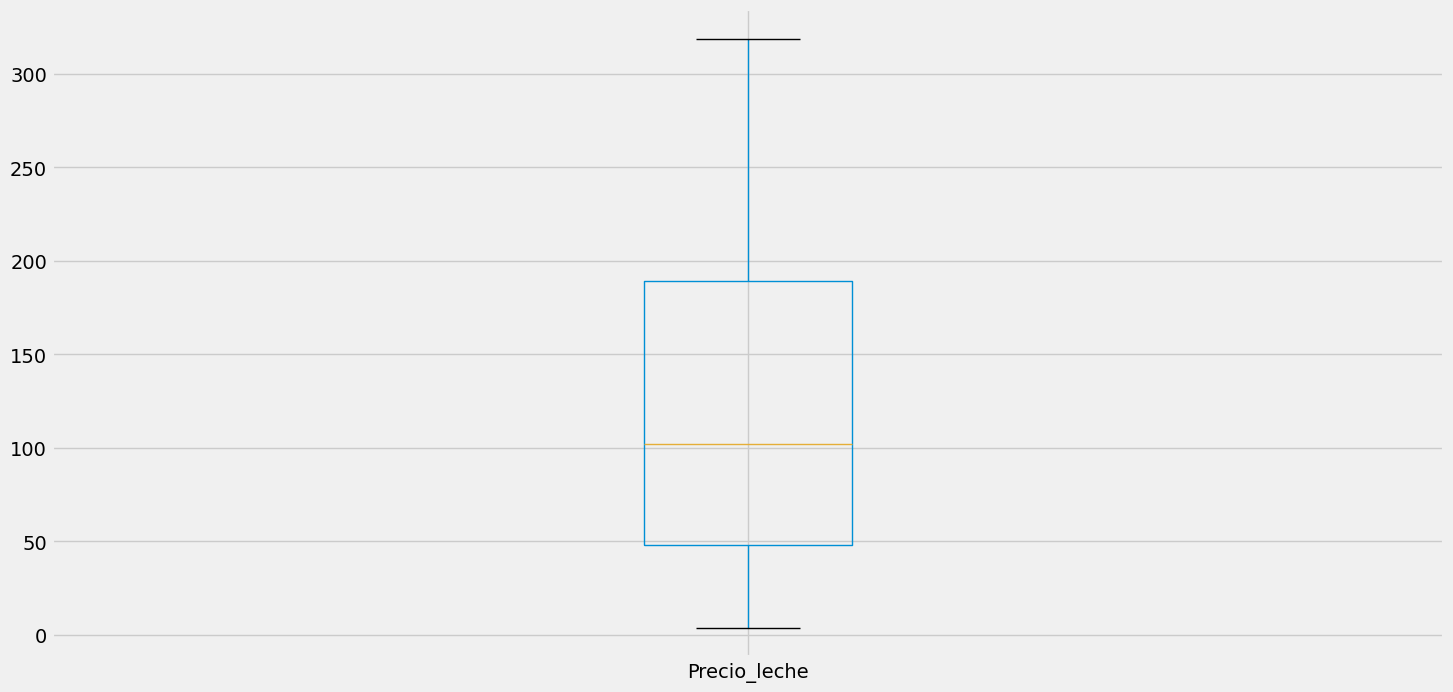

In [84]:
precios.boxplot('Precio_leche')

/Users/dannygc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


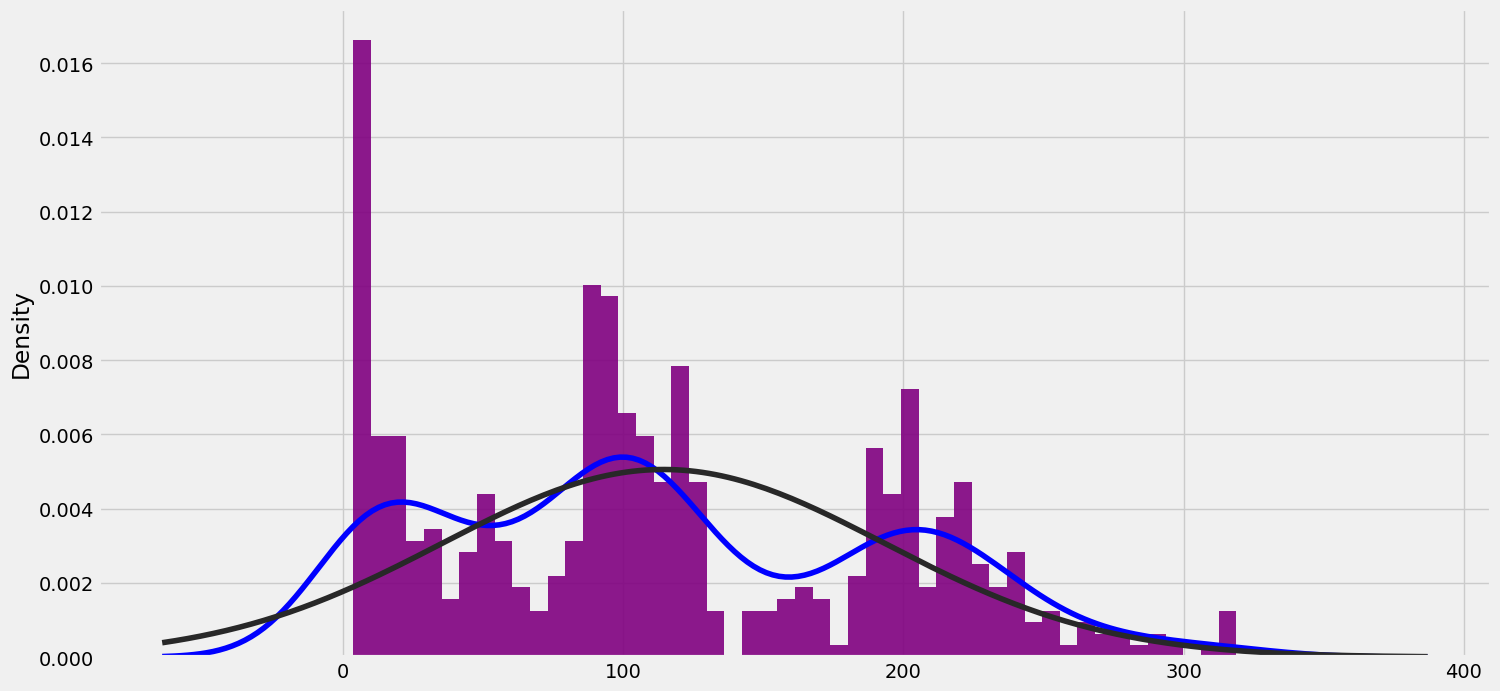

In [81]:
sns.distplot(x = precios['Precio_leche'], fit = norm, kde = True, bins = 50, color = 'b', hist_kws = {'color':'purple', 'alpha':0.9})

To merge the databases, it needs to have the same type format of data. Therefore, in the next section, we will standardize the date format. This will allow us to merge the three databases smoothly.

In [9]:
varClim.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [10]:
varMacr.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [11]:
col_change = varMacr.loc[:,((varMacr.dtypes == 'O')&(varMacr.columns.values != 'Periodo'))].columns.values

def eliminate(x):
    if pd.isnull(x) == True:
        return np.nan
    elif len(x.split('.')) < 3:
        if len(x.split('.')) > 1:
            return float(x.split('.')[0]+'.'+x.split('.')[1])
        else:
            return float(x)
    else:
        return float(x.split('.')[0]+'.'+x.split('.')[1]+x.split('.')[2])

for col in col_change:
    varMacr[col] = varMacr.apply(lambda row: eliminate(row[col]), axis=1)

In [12]:
precios.dtypes

Anio              int64
Mes              object
Precio_leche    float64
dtype: object

### Dates Standarization

In [13]:
varClim['date'] = varClim['date'].apply(pd.to_datetime)
varClim['date']

0     1989-02-01
1     1998-10-01
2     2001-02-01
3     2008-11-01
4     2009-04-01
         ...    
491   1988-10-01
492   2019-08-01
493   2015-06-01
494   2016-09-01
495   1982-04-01
Name: date, Length: 496, dtype: datetime64[ns]

In [14]:
varClim.rename(columns = {'date': 'Date'},inplace = True)

In [15]:
#varMacr['Periodo']  = pd.to_datetime(varMacr['Periodo'], errors = 'raise', dayfirst=False, yearfirst=True)

It seems like the monts are out of bounds. There is a month that seems to have  a 13 value. Since this row has no much information, we will drop it

In [16]:
varMacr.loc[varMacr['Periodo'] == '2020-13-01 00:00:00 UTC']


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
89,2020-13-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,803.222345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893.234345,NaN


In [17]:
varMacr.shape

(614, 85)

In [18]:
varMacr = varMacr[varMacr['Periodo'] != '2020-13-01 00:00:00 UTC']

In [19]:
varMacr.shape


(613, 85)

In [20]:
varMacr['Periodo']  = pd.to_datetime(varMacr['Periodo'], errors = 'raise', dayfirst=False, yearfirst=True,utc = False)
varMacr['Periodo'] = varMacr['Periodo'].dt.tz_localize(None)

In [21]:
varMacr.rename(columns = {'Periodo': 'Date'},inplace = True)

In [22]:
precios.Anio = precios.Anio.astype('str')

In [23]:
precios.Mes= precios.Mes.map({'Ene':'01','Feb':'02','Mar':'03','Abr':'04','May':'05','Jun':'06','Jul':'07','Ago':'08','Sep':'09','Oct':'10','Nov':'11','Dic':'12'})

In [24]:
precios.Mes

0      01
1      02
2      03
3      04
4      05
       ..
501    10
502    11
503    12
504    01
505    02
Name: Mes, Length: 506, dtype: object

In [25]:
precios['Date'] = precios['Anio'] +  '-' + precios['Mes']  + '-' + '01'

In [26]:
precios['Date']

0      1979-01-01
1      1979-02-01
2      1979-03-01
3      1979-04-01
4      1979-05-01
          ...    
501    2020-10-01
502    2020-11-01
503    2020-12-01
504    2021-01-01
505    2021-02-01
Name: Date, Length: 506, dtype: object

In [27]:
precios.drop(['Anio','Mes'], axis = 1,inplace = True)

In [28]:
precios

,Precio_leche,Date
0,3.85,1979-01-01
1,4.58,1979-02-01
2,5.18,1979-03-01
3,6.06,1979-04-01
4,7.25,1979-05-01
...,...,...
501,274.32,2020-10-01
502,288.09,2020-11-01
503,287.29,2020-12-01
504,287.60,2021-01-01


### Duplicated Rows

In [29]:
precios[precios.duplicated()]

,Precio_leche,Date


In [30]:
varClim[varClim.duplicated()]

,Date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios


In [31]:
varMacr.loc[varMacr.duplicated()]

,Date,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
66,2018-08-01,109.690834,994.693267,101.027633,1.051861,931.900957,106.248833,117.404143,109.458386,110.578221,...,911.086301,102.691109,983.228221,108.792744,105.596535,654.060172,113.525936,103.995337,15.375472,38729.0
79,2019-08-01,113.886371,103.237519,106.828407,105.153122,984.395274,106.901816,122.596004,113.695907,114.580893,...,948.715254,104.034103,102.619922,107.666732,104.591452,6598.000000,116.203109,107.385297,15.342321,33059.0


In [32]:
varMacr.duplicated('Date').sum()

2

This columns are identified as duplicates but we can clearly see that while they are similar they are different values. 

In [33]:
varMacr['Date'].iloc[66] == varMacr['Date'].iloc[79]

False

In [34]:
len(varMacr['Date'].unique())

611

In [35]:
print("Unique Value Count:")
cols = varMacr.columns.tolist()
for col in cols:
  print(col + " = " + str(len(varMacr[col].unique())))

Unique Value Count:
Date = 611
Imacec_empalmado = 299
Imacec_produccion_de_bienes = 299
Imacec_minero = 299
Imacec_industria = 299
Imacec_resto_de_bienes = 299
Imacec_comercio = 299
Imacec_servicios = 299
Imacec_a_costo_de_factores = 299
Imacec_no_minero = 299
PIB_Agropecuario_silvicola = 94
PIB_Pesca = 94
PIB_Mineria = 94
PIB_Mineria_del_cobre = 94
PIB_Otras_actividades_mineras = 94
PIB_Industria_Manufacturera = 94
PIB_Alimentos = 94
PIB_Bebidas_y_tabaco = 94
PIB_Textil = 94
PIB_Maderas_y_muebles = 94
PIB_Celulosa = 94
PIB_Refinacion_de_petroleo = 94
PIB_Quimica = 94
PIB_Minerales_no_metalicos_y_metalica_basica = 94
PIB_Productos_metalicos = 94
PIB_Electricidad = 94
PIB_Construccion = 94
PIB_Comercio = 94
PIB_Restaurantes_y_hoteles = 94
PIB_Transporte = 94
PIB_Comunicaciones = 94
PIB_Servicios_financieros = 94
PIB_Servicios_empresariales = 94
PIB_Servicios_de_vivienda = 94
PIB_Servicios_personales = 94
PIB_Administracion_publica = 94
PIB_a_costo_de_factores = 94
Impuesto_al_valor_agre

In [36]:
varClim.index

RangeIndex(start=0, stop=496, step=1)

### Setting Indexex

In [37]:
precios = precios.set_index(pd.DatetimeIndex(precios['Date'], tz = None)).drop('Date',axis = 1)
varClim = varClim.set_index(pd.DatetimeIndex(varClim['Date'], tz = None)).drop('Date',axis = 1)
varMacr = varMacr.set_index(pd.DatetimeIndex(varMacr['Date'], tz = None)).drop('Date',axis = 1)

In [38]:
precios = precios.sort_index()
varClim = varClim.sort_index()
varMacr = varMacr.sort_index()

## Visualizations

In [39]:
def plot_prec_data(data, group_name, initial_date_year, initial_date_month, final_date_year, final_date_month):
    '''
    This function plots precipitation of a determined range
    Args:
        - data: the complete dataset,
        - group_name: the column name,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''
    assert (group_name in data.columns.values) , 'Not a valid region name'
    assert (initial_date_year in data.index.year) and (final_date_year in data.index.year), 'Not a valid date'
    temp = data.loc[str(initial_date_year)+'-'+str(initial_date_month)+'-1':str(final_date_year)+'-'+str(final_date_month)+'-1']
    fig, ax = plt.subplots()
    ax.plot(temp[group_name])
    ax.set_ylabel('Precipitation', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of the Precipitation in '+group_name)
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return temp , plt

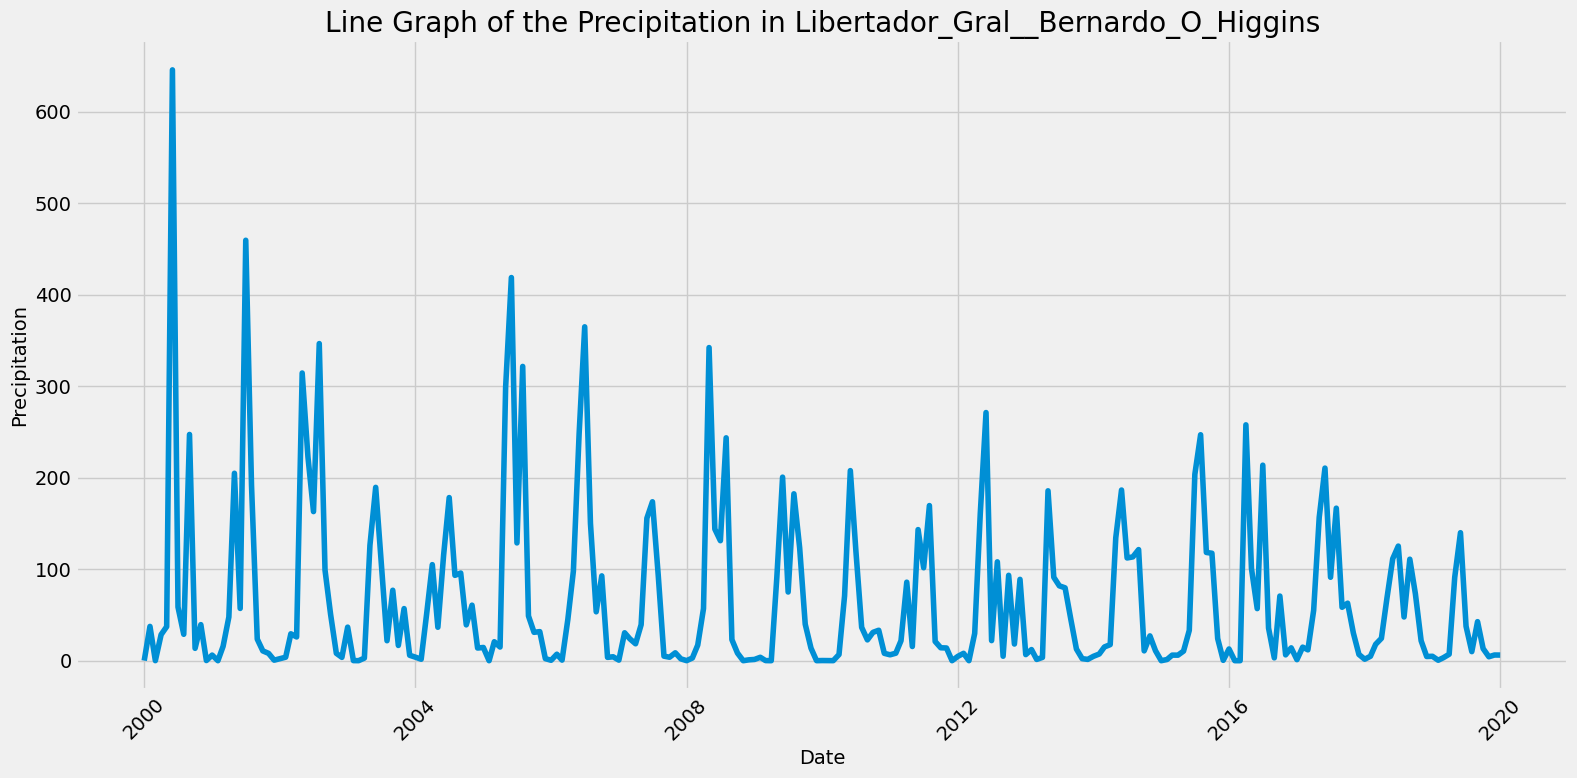

In [40]:
tempPrec, pltPrec = plot_prec_data(varClim, 'Libertador_Gral__Bernardo_O_Higgins',2000,1,2020,1)
plt.show()

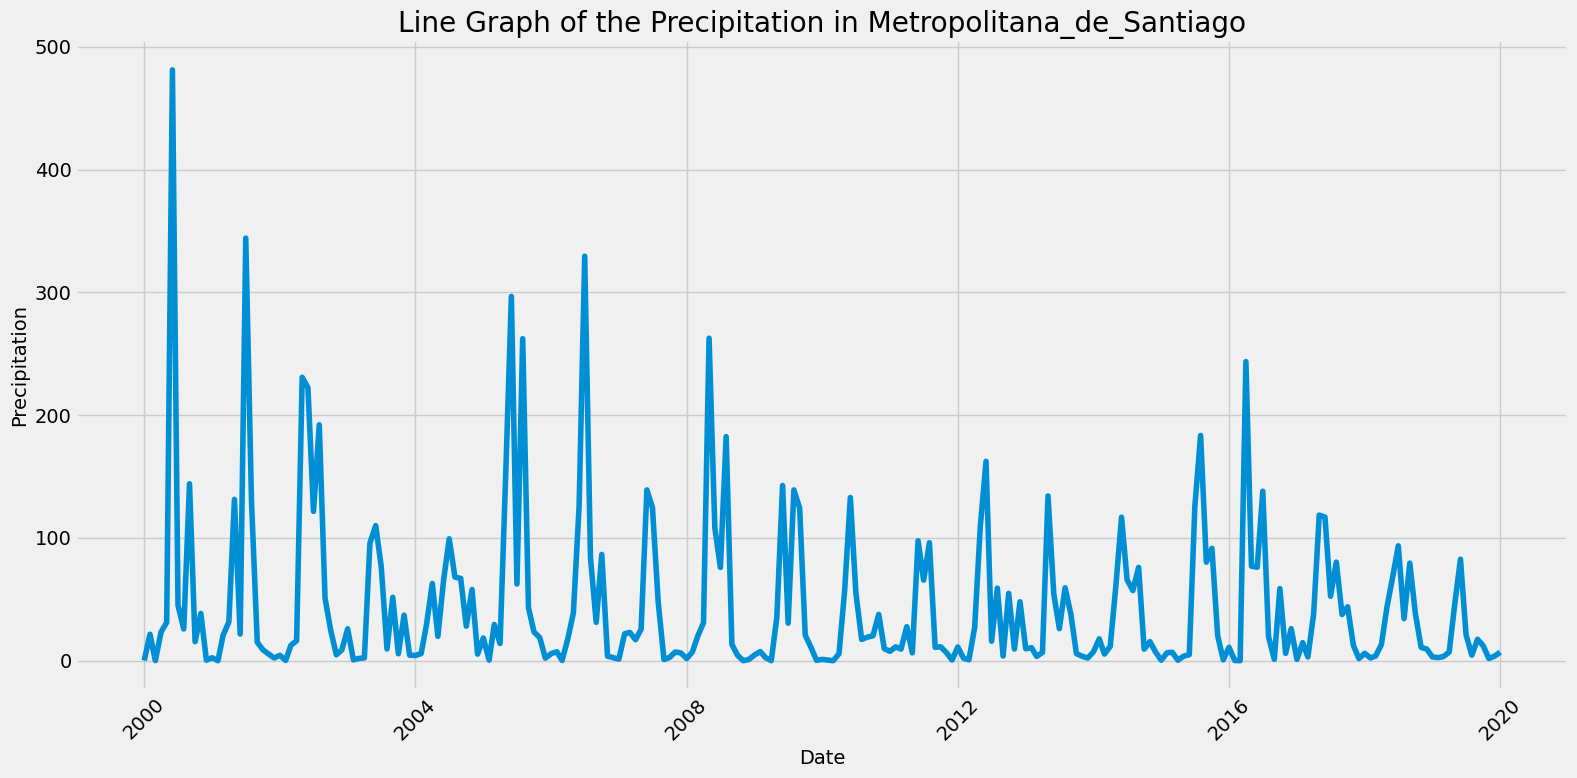

In [41]:
tempPrec2, pltPrec2 = plot_prec_data(varClim, 'Metropolitana_de_Santiago',2000,1,2020,1)
plt.show()

A time series data is stationary when it does not have a dependency on time, in other words, when there is no trend, seasonal effect, cyclicity or irregularity. 
By looking at the graph we notice that the data is not consistent over time,and there seems a trend of the precipitation values gradually decreasing over time. 

In [42]:
temp_data = tempPrec['Libertador_Gral__Bernardo_O_Higgins'].values
split = round(len(temp_data) / 2)
part1, part2 = temp_data[0:split], temp_data[split:]
mean1, mean2 = part1.mean(), part2.mean()
var1, var2 = part1.var(), part2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'variance1={var1}, variance2={var2}')

mean1=79.3333498652919, mean2=54.675902751062935
variance1=12620.161365772377, variance2=4313.2962878978315


In [43]:
temp_data = tempPrec2['Metropolitana_de_Santiago'].values
split = round(len(temp_data) / 2)
part1, part2 = temp_data[0:split], temp_data[split:]
mean1, mean2 = part1.mean(), part2.mean()
var1, var2 = part1.var(), part2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'variance1={var1}, variance2={var2}')

mean1=55.528579693155834, mean2=35.80269676854514
variance1=6782.307159091052, variance2=1974.4124026127254


When dividing the data in two and checking its mean and variance we can also see that the mean and variance are very different. 

Another way to determine seasonality is with a statistical test called "Unit Root Test". In this analysis we will use the most commonly used of these tests, the Augmented Dickey Fuller test (ADH Test). The null hypothesis states that the data is non-stationay.

In [44]:
def check_stationarity(data,region):
    df = data[region]
    result = adfuller(np.array(data[region]))
    print('ADF Statistic: '+str(result[0]))
    print('p-value: '+str(result[1]))

In [45]:
check_stationarity(varClim,'Libertador_Gral__Bernardo_O_Higgins')

ADF Statistic: -5.538911698839085
p-value: 1.7193931887285261e-06


In [46]:
check_stationarity(varClim,'Metropolitana_de_Santiago')

ADF Statistic: -5.589754932467118
p-value: 1.3374350973570719e-06


The p-value is small,  there is enough statistical evidence to  reject the Ho with a significance level of less than 1% . Hence the test shows the data as stationary.

In [47]:
def plot_monthly_prec_data(data, group_name, years_list):
    '''
    This function plots pib of a determined range
    Args:
        - data: the complete dataset,
        - group_name: the region's name,
        - years_list: the list of years,
    '''
    assert (group_name in data.columns.values) , 'Not a valid region name'
    months = [month for month in data.index.strftime('%b').unique()]

    #unique colors
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years_list), replace = False)

    #plot
    fig, ax = plt.subplots()
    for index, year in enumerate(years_list): 
        ax.plot(months, data.loc[data.index.year == year , group_name], color = mycolors[index], label = year )
        ax.legend()
        ax.set_ylabel('Precipitation (mm)', fontsize=14)
        ax.set_xlabel('Month', fontsize=14)
        ax.set_title('Line Graphs of the Precipitation in '+group_name)
        ax.tick_params(axis='x', labelrotation=45)
        fig.tight_layout()



    return plt.show()

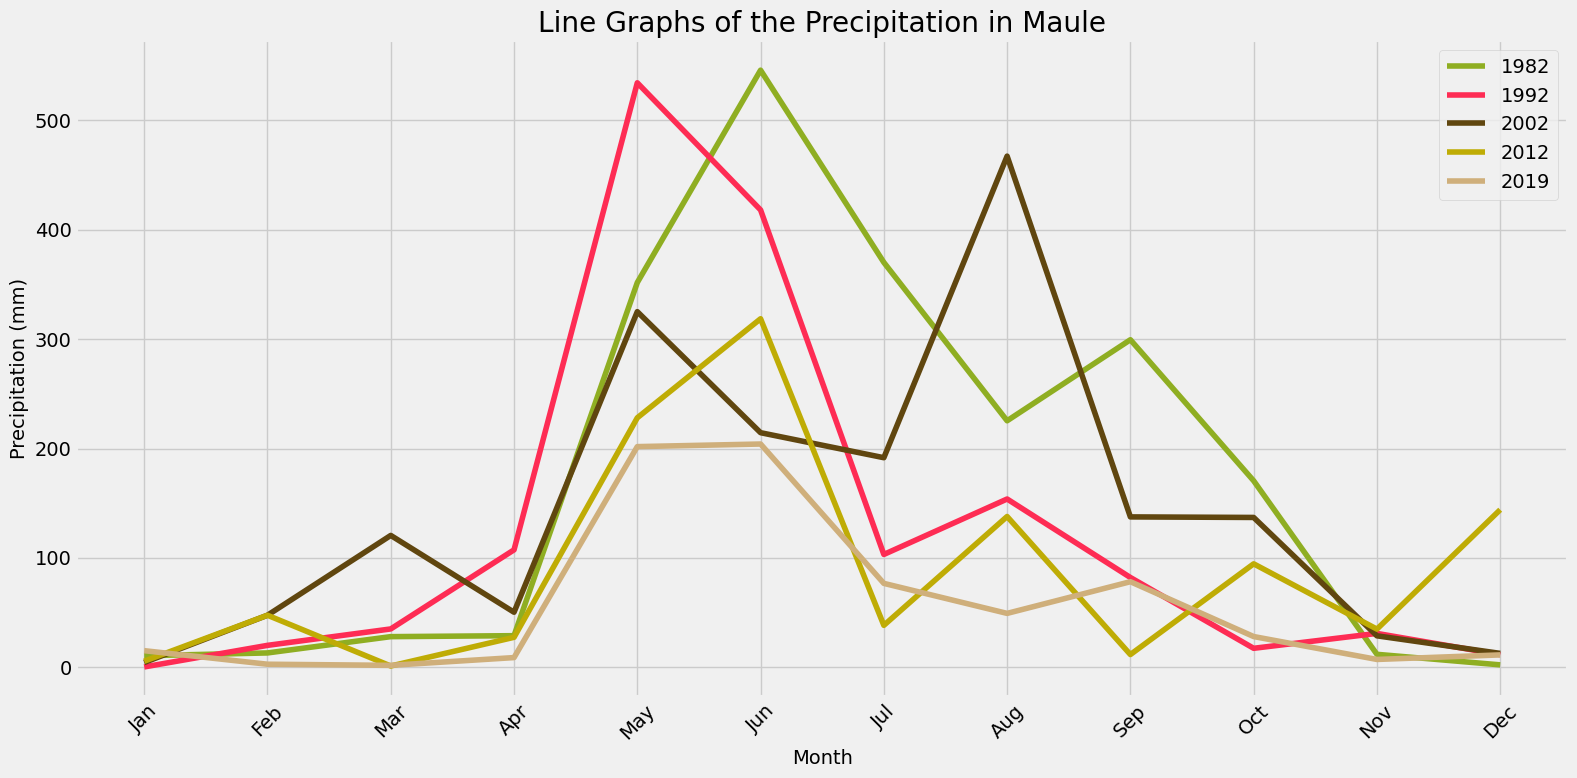

In [48]:
plot_monthly_prec_data(varClim, 'Maule', [1982,1992,2002,2012,2019])

**Multiple Years Graph Analysis** 

Overall, the graph illustrates three main insights for the behavior of precipitation for Maule's region: a decrease of the average precipitation, a decrease of precipitation coverage, and a change in the months when the maximum peak value occurred.

- In this graph, we can clearly see how the value of precipitation has decreased through the decades. At the start of the period is when the maximum value of precipitation was reported, reaching almost 550mm. This value fell from the initial decade in 1982 to the final one in 2019, where the value reached its maximum of only 200mm, a significant reduction of 63%.

- Next, the data exhibits a seasonal pattern showing that the highest values for precipitations in Maule's region commonly occurs during the second and third quarter of the year. However, we can see that the precipitation window has also been affected through the decades, ahowing a coverage of almost five months in the initial period and only covering a month for the final decade. 

- Lastly, the line graph displays a variation of the months when the precipitation was at its highest. In the first period, the maximum value was reported in June. A decade later, this peak value was found a month earlier, but this was slightly lower than the previous decade. In 2002, the peak was delayed and found until August, and the value was significantly lower than the last two decades. Once more, in 2012, this value decreased, and the decrease was the largest of the previously observed. For this decade, the maximum precipitation was found in June. Finally, for 2019 the maximum precipitation value was identified during May, where the data plateaued for a month and then decreased.


In [85]:
def plot_pib(data, group_name, initial_date_year, initial_date_month, final_date_year, final_date_month):
    '''
    This function plots pib of a determined range
    Input:
        - data: the complete dataset,
        - group_name: the column name of the pib to plot,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''
    assert (group_name in data.columns.values) and (initial_date_year in data.index.year) and (final_date_year in data.index.year), 'Choose a valid group name, initial date, and final date'

    temp = data.loc[str(initial_date_year)+'-'+str(initial_date_month)+'-1':str(final_date_year)+'-'+str(final_date_month)+'-1']
    
    fig, ax = plt.subplots()
    ax.plot(temp.index,temp[group_name])
    ax.set_ylabel('PIB', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of '+group_name)
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return None

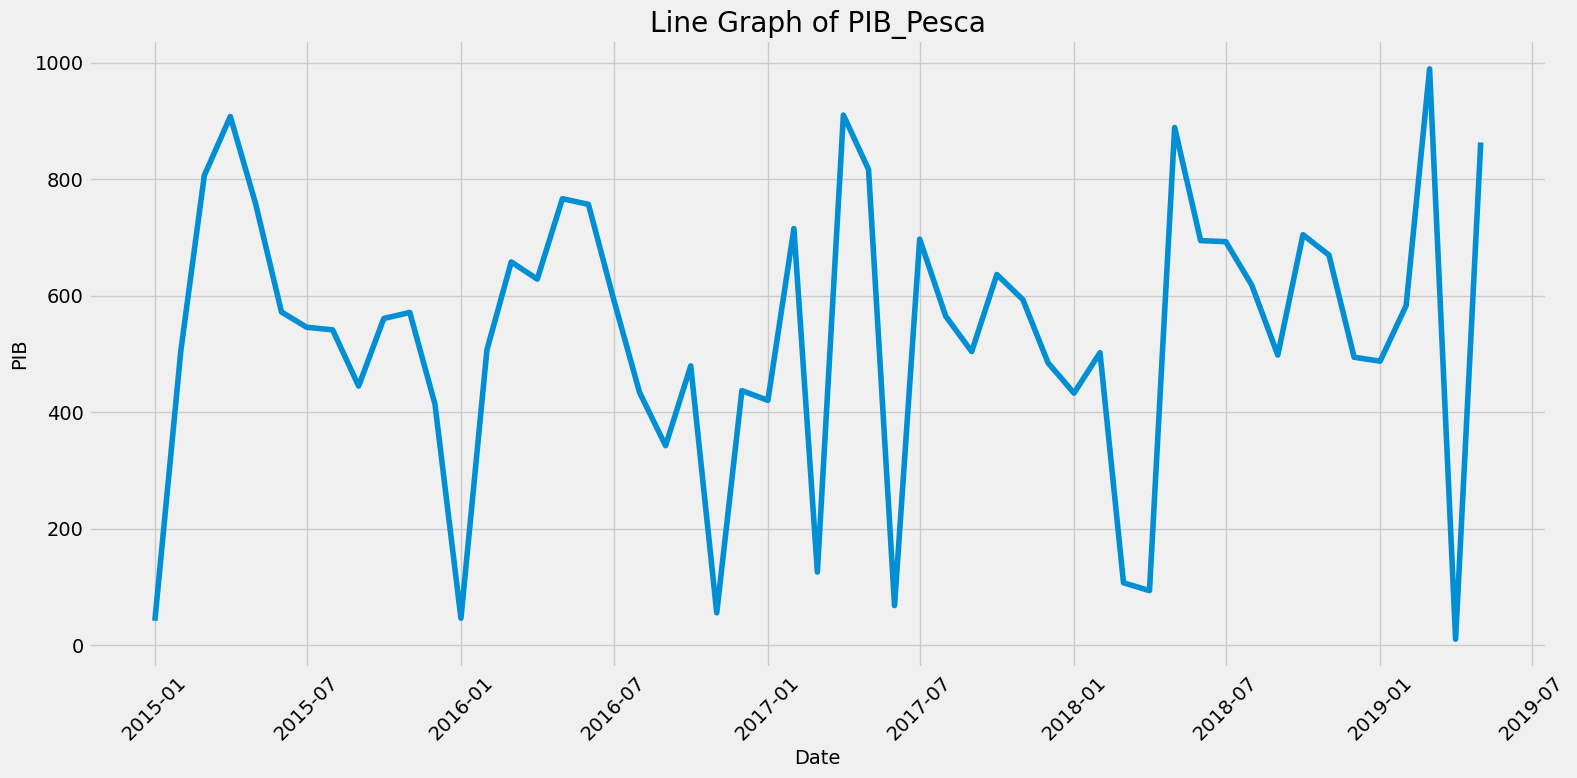

In [86]:
plot_pib(varMacr, 'PIB_Pesca', 2015, 1,2019, 5)

In [87]:
def plot_pib_agrosilva_servi(data):
    '''
    This function plots pib of a determined range
    Input:
        - data: the complete dataset,
        - group_name: the column name of the pib to plot,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''

    temp = data.loc['2013-1-1':,['PIB_Agropecuario_silvicola','PIB_Servicios_financieros']]
    
    fig, ax = plt.subplots()
    ax.plot(temp.index, temp['PIB_Agropecuario_silvicola'], label='PIB Agropecuario Silvicola')
    ax.plot(temp.index, temp['PIB_Servicios_financieros'], label='PIB Serivicios Financieros')
    ax.legend(loc='best')
    ax.set_ylabel('PIB', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of PIB')
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return None

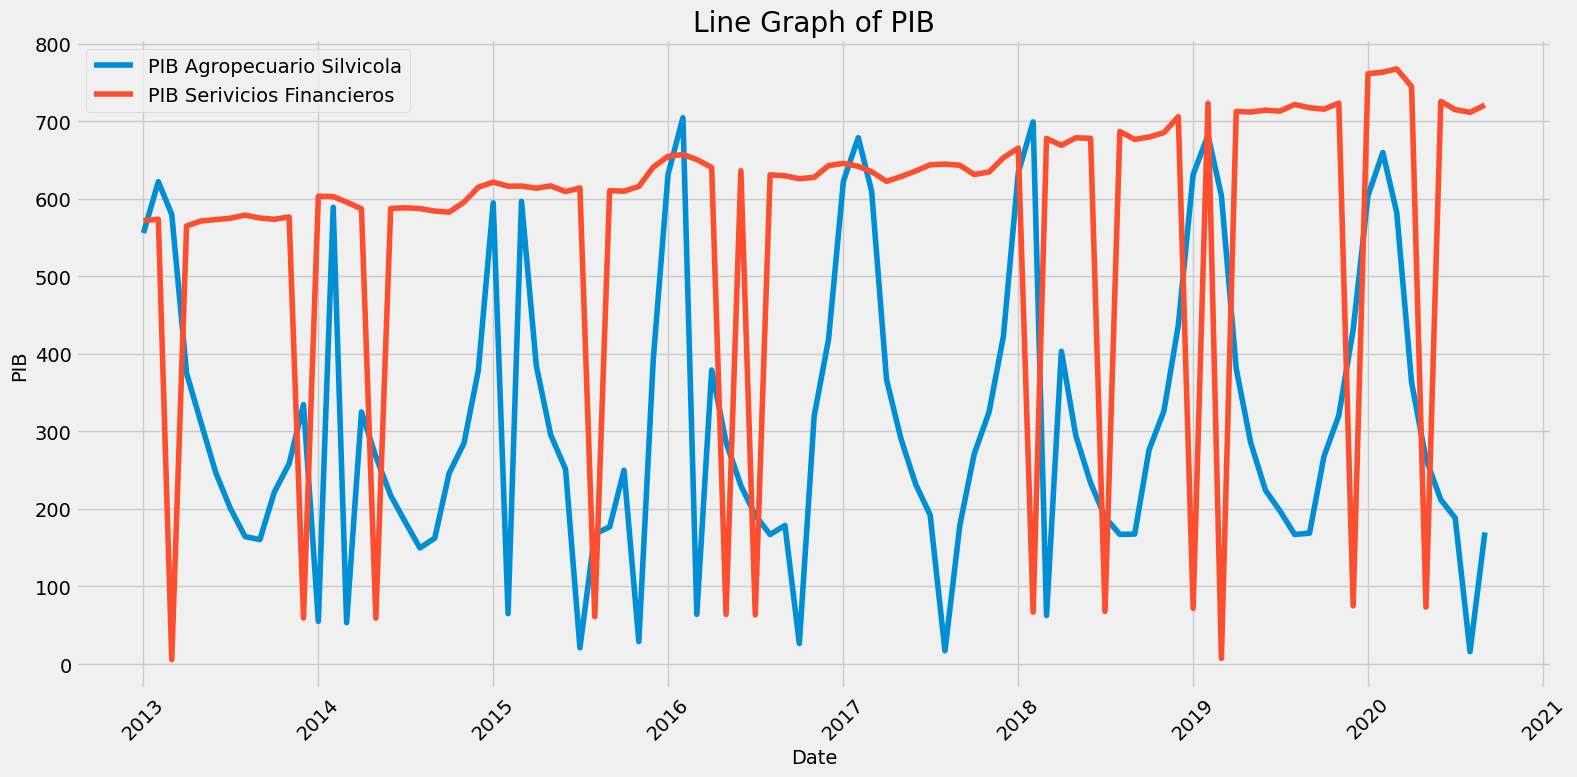

In [88]:
plot_pib_agrosilva_servi(varMacr)

**PIB Graph Analysis** 

The graph illustrates an upward trend of the financial services PIB. On the other hand, the Agropecuario Silvicola PIB semms to have a seasonality trend. Additionally, there seems to be a correlation between the two; Agropecuario Silvicola PIB's spikes match a rising strake of the financial services PIB.

### Merging the DataFrames

Before merging the dataframes, we will add a pre-fix to the precipitations variables

In [49]:
df = precios.merge(varClim.add_prefix('precipitation_'), left_index = True, right_index = True)

In [50]:
df = df.merge(varMacr, left_index = True, right_index = True)

In [51]:
df

,Precio_leche,precipitation_Coquimbo,precipitation_Valparaiso,precipitation_Metropolitana_de_Santiago,precipitation_Libertador_Gral__Bernardo_O_Higgins,precipitation_Maule,precipitation_Biobio,precipitation_La_Araucania,precipitation_Los_Rios,Imacec_empalmado,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
Date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,3.85,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,4.58,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,5.18,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,6.06,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,7.25,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,253.86,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090,122.347724,...,102.744815,111.252144,114.377499,108.484149,108.803992,6786.4,146.293085,139.938562,173.115611,31090.0
2020-01-01,254.10,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625,110.288587,...,103.527477,101.007846,926.196774,111.139827,106.953412,6798.2,10.990377,106.139507,125.792769,32104.0
2020-02-01,270.15,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889,106.982117,...,104.899349,973.346365,914.239245,105.197492,101.356894,6368.2,109.187214,107.607749,115.854156,25025.0


### Handling Missing Values

In [52]:
df.fillna(np.nan, inplace = True)

In [53]:
print('The total number of variables is:', df.shape[1])
print('The total number of rows is:', df.shape[0])

The total number of variables is: 93
The total number of rows is: 498


In [54]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.80)]['Total'].count()

56

In [55]:
missing_data.head(10)

,Total,Percent
No_sabe__No_responde_Miles_de_personas,494,0.991968
Indice_de_ventas_comercio_real_no_durables_IVCM,420,0.843373
Indice_de_ventas_comercio_real_IVCM,420,0.843373
Indice_de_ventas_comercio_real_durables_IVCM,420,0.843373
Indice_de_produccion_industrial_electricidad__gas_y_agua,420,0.843373
Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,410,0.823293
Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,410,0.823293
Ocupacion_en_Transporte_y_almacenamiento_INE,410,0.823293
Ocupacion_en_Informacion_y_comunicaciones_INE,410,0.823293
Ocupacion_en_Actividades_financieras_y_de_seguros_INE,410,0.823293


There were 56 columns out of 93 with more than 80% of missing data. 

Two approaches for managing the missing values: 

- Removing all variables with more than 50% of missing values.
- Removing based on 5 year ranges and then variables with more than 50% of missing values

#### Approach 1

In [56]:
df_1 = df.copy() 

In [57]:
frac = len(df_1) * 0.5
df_1= df_1.dropna(thresh=frac, axis=1)

In [58]:
total = df_1.isnull().sum().sort_values(ascending=False)
percent = (df_1.isnull().sum()/df_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Generacion_de_energia_electrica_CDEC_GWh,240,0.481928
Imacec_no_minero,204,0.409639
Imacec_empalmado,204,0.409639
Imacec_produccion_de_bienes,204,0.409639
Imacec_minero,204,0.409639
Imacec_industria,204,0.409639
Imacec_resto_de_bienes,204,0.409639
Imacec_servicios,204,0.409639
Imacec_a_costo_de_factores,204,0.409639
Imacec_comercio,204,0.409639


In [59]:
print('The total number of variables is:', df_1.shape[1])
print('The total number of rows is:', df_1.shape[0])

The total number of variables is: 29
The total number of rows is: 498


In [60]:
df_1.columns

Index(['Precio_leche', 'precipitation_Coquimbo', 'precipitation_Valparaiso',
       'precipitation_Metropolitana_de_Santiago',
       'precipitation_Libertador_Gral__Bernardo_O_Higgins',
       'precipitation_Maule', 'precipitation_Biobio',
       'precipitation_La_Araucania', 'precipitation_Los_Rios',
       'Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero',
       'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio',
       'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_del_petroleo_WTI_dolaresbarril',
       'Tipo_de_cambio_del_dolar_observado_diario',
       'Tipo_de_cambio_nominal_multilateral___TCM',
       'Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100',
       'Indice_de_produccion_industrial__mineria',


#### Approach 2

When taking a look at the date it was identified that there are many missing data but in the years previous to 1995. Considering that this years are very old , more value could be obtained from the variables instead of removing them based on dates

In [61]:
missing = df.isnull().groupby(df.index.year // 5 * 5).sum().sum(axis = 1)
percent = missing/ missing.sum()
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Date,,
1975,960,0.033949
1980,4751,0.168010
1985,4632,0.163802
1990,4512,0.159559
1995,3996,0.141311
2000,3660,0.129429
2005,3573,0.126353
2010,2132,0.075394
2015,62,0.002193


The years that are dropped are those before 1995.

In [62]:
df = df.loc[df.index.year > 1995]

In [63]:
missing = df.isnull().groupby(df.index.year // 5 * 5).sum().sum(axis = 1)
percent = missing/ missing.sum()
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Date,,
1995,3108,0.247946
2000,3660,0.291982
2005,3573,0.285042
2010,2132,0.170084
2015,62,0.004946
2020,0,0.000000


In [64]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.50)]['Total'].count()

59

In [65]:
frac = len(df) * 0.5
df= df.dropna(thresh=frac, axis=1)

In [66]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.50)]['Total'].count()

0

In [67]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Precio_del_propano_centavos_de_dolargalon_DTN,144,0.489796
Precio_del_diesel_centavos_de_dolargalon,129,0.438776
Precio_del_petroleo_Brent_dolaresbarril,48,0.163265
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,48,0.163265
Precio_del_kerosene_dolaresm3,48,0.163265
Generacion_de_energia_electrica_CDEC_GWh,36,0.122449
precipitation_Libertador_Gral__Bernardo_O_Higgins,0,0.000000
precipitation_Maule,0,0.000000
precipitation_Metropolitana_de_Santiago,0,0.000000
Imacec_resto_de_bienes,0,0.000000


There are still 6 variables with missing values.

In [68]:
print('The total number of variables is:', df.shape[1])
print('The total number of rows is:', df.shape[0])

The total number of variables is: 34
The total number of rows is: 294


In [69]:
df.columns

Index(['Precio_leche', 'precipitation_Coquimbo', 'precipitation_Valparaiso',
       'precipitation_Metropolitana_de_Santiago',
       'precipitation_Libertador_Gral__Bernardo_O_Higgins',
       'precipitation_Maule', 'precipitation_Biobio',
       'precipitation_La_Araucania', 'precipitation_Los_Rios',
       'Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero',
       'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio',
       'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_del_diesel_centavos_de_dolargalon',
       'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
       'Precio_del_petroleo_Brent_dolaresbarril',
       'Precio_del_kerosene_dolaresm3',
       'Precio_del_petroleo_WTI_dolaresbarril',

### Duplicated Rows

In [70]:
df[df.duplicated()]

,Precio_leche,precipitation_Coquimbo,precipitation_Valparaiso,precipitation_Metropolitana_de_Santiago,precipitation_Libertador_Gral__Bernardo_O_Higgins,precipitation_Maule,precipitation_Biobio,precipitation_La_Araucania,precipitation_Los_Rios,Imacec_empalmado,...,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,234.95,2.231471,17.725471,34.241007,47.779008,84.133977,143.225532,196.384501,328.763527,109.690834,...,73.13,5.319667,67.99,97.452,656.250909,102.822273,911.086301,983.228221,105.596535,654.060172
2019-08-01,266.37,0.000000,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020,113.886371,...,59.25,44.221796,54.84,40.375,713.703333,106.596667,948.715254,102.619922,104.591452,6598.000000


### Missing Value Imputation

In [71]:
from fancyimpute import KNN

In [72]:
df_knn1 = df_1.copy()
df_knn = df.copy()


In [73]:
df_knn.isna().sum().sort_values(ascending=False)

Precio_del_propano_centavos_de_dolargalon_DTN                           144
Precio_del_diesel_centavos_de_dolargalon                                129
Precio_del_petroleo_Brent_dolaresbarril                                  48
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas     48
Precio_del_kerosene_dolaresm3                                            48
Generacion_de_energia_electrica_CDEC_GWh                                 36
precipitation_Libertador_Gral__Bernardo_O_Higgins                         0
precipitation_Maule                                                       0
precipitation_Metropolitana_de_Santiago                                   0
Imacec_resto_de_bienes                                                    0
precipitation_Valparaiso                                                  0
precipitation_Coquimbo                                                    0
precipitation_Biobio                                                      0
precipitatio

In [74]:
#Create Imputer
imputer = KNN()
# Impute 
df_knn.iloc[:,:] = np.round(imputer.fit_transform(df))

Imputing row 1/294 with 6 missing, elapsed time: 0.046
Imputing row 101/294 with 2 missing, elapsed time: 0.052
Imputing row 201/294 with 0 missing, elapsed time: 0.055


In [75]:
total = df_knn.isnull().sum().sort_values(ascending=False)
percent = (df_knn.isnull().sum()/df_knn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Generacion_de_energia_electrica_CDEC_GWh,0,0.0
precipitation_Los_Rios,0,0.0
Imacec_comercio,0,0.0
Imacec_resto_de_bienes,0,0.0
Imacec_industria,0,0.0
Imacec_minero,0,0.0
Imacec_produccion_de_bienes,0,0.0
Imacec_empalmado,0,0.0
precipitation_La_Araucania,0,0.0
Indice_de_produccion_industrial__manufacturera,0,0.0


In [76]:
df_knn1.isna().sum().sort_values(ascending=False)

Generacion_de_energia_electrica_CDEC_GWh                 240
Imacec_no_minero                                         204
Imacec_empalmado                                         204
Imacec_produccion_de_bienes                              204
Imacec_minero                                            204
Imacec_industria                                         204
Imacec_resto_de_bienes                                   204
Imacec_servicios                                         204
Imacec_a_costo_de_factores                               204
Imacec_comercio                                          204
Tipo_de_cambio_nominal_multilateral___TCM                192
Indice_de_produccion_industrial__manufacturera           144
Indice_de_produccion_industrial__mineria                 132
Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100     84
Precio_del_petroleo_WTI_dolaresbarril                     52
Tipo_de_cambio_del_dolar_observado_diario                 43
precipitation_Biobio    

In [77]:
#Create Imputer
imputer2 = KNN()
# Impute 
df_knn1.iloc[:,:] = np.round(imputer.fit_transform(df_1))

Imputing row 1/498 with 16 missing, elapsed time: 0.112
Imputing row 101/498 with 13 missing, elapsed time: 0.140
Imputing row 201/498 with 10 missing, elapsed time: 0.165
Imputing row 301/498 with 0 missing, elapsed time: 0.170
Imputing row 401/498 with 0 missing, elapsed time: 0.177


In [78]:
total = df_knn1.isnull().sum().sort_values(ascending=False)
percent = (df_knn1.isnull().sum()/df_knn1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Generacion_de_energia_electrica_CDEC_GWh,0,0.0
Imacec_resto_de_bienes,0,0.0
precipitation_Coquimbo,0,0.0
precipitation_Valparaiso,0,0.0
precipitation_Metropolitana_de_Santiago,0,0.0
precipitation_Libertador_Gral__Bernardo_O_Higgins,0,0.0
precipitation_Maule,0,0.0
precipitation_Biobio,0,0.0
precipitation_La_Araucania,0,0.0
precipitation_Los_Rios,0,0.0


In [79]:
df_1 = df_knn1.copy()
df = df_knn.copy()

## Feature Engineering

## Modelling 